
#### Project Outline

- We're going to scrape https://github.com/topics
- We'll get a list of topics. For each topic, we'll get topic title, topic page URL and topic description
- For each topic, we'll get the top 25 repositories in the topic from the topic page
- For each repository, we'll grab the repo name, username, stars and repo URL
- For each topic we'll create a CSV file in the following format:

```
Repo Name,Username,Stars,Repo URL
three.js,mrdoob,69700,https://github.com/mrdoob/three.js
libgdx,libgdx,18300,https://github.com/libgdx/libgdx
```

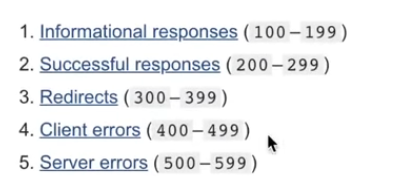

In [2]:
import requests

In [3]:
topics_url = "https://github.com/topics"

In [4]:
response = requests.get(topics_url)

In [5]:
response.status_code

200

In [6]:
page_contents = response.text
# this will extract the html of the webpage from which you want to extract the data

In [7]:
#printing the first 1000 html code
page_contents[:1000]

'\n\n<!DOCTYPE html>\n<html lang="en" data-color-mode="auto" data-light-theme="light" data-dark-theme="dark"  data-a11y-animated-images="system">\n  <head>\n    <meta charset="utf-8">\n  <link rel="dns-prefetch" href="https://github.githubassets.com">\n  <link rel="dns-prefetch" href="https://avatars.githubusercontent.com">\n  <link rel="dns-prefetch" href="https://github-cloud.s3.amazonaws.com">\n  <link rel="dns-prefetch" href="https://user-images.githubusercontent.com/">\n  <link rel="preconnect" href="https://github.githubassets.com" crossorigin>\n  <link rel="preconnect" href="https://avatars.githubusercontent.com">\n\n  \n\n  <link crossorigin="anonymous" media="all" rel="stylesheet" href="https://github.githubassets.com/assets/light-8cafbcbd78f4.css" /><link crossorigin="anonymous" media="all" rel="stylesheet" href="https://github.githubassets.com/assets/dark-31dc14e38457.css" /><link data-color-theme="dark_dimmed" crossorigin="anonymous" media="all" rel="stylesheet" data-href="

In [8]:
# with open ('webpage.html') as f:
#   f.write(page_contents)

In [9]:
from bs4 import BeautifulSoup

In [10]:
#parse the html code thing using beautifulSoup
parsed_document = BeautifulSoup(page_contents, 'html.parser')

In [11]:
type(parsed_document)

bs4.BeautifulSoup

In [12]:
#depending on what kind of data we want (in our case the topic title and the description, we will extract the html element containing the data we want)
topic_title_tags = parsed_document.find_all('p', {'class':"f3 lh-condensed mb-0 mt-1 Link--primary"})

In [13]:
print(topic_title_tags[:5])

[<p class="f3 lh-condensed mb-0 mt-1 Link--primary">3D</p>, <p class="f3 lh-condensed mb-0 mt-1 Link--primary">Ajax</p>, <p class="f3 lh-condensed mb-0 mt-1 Link--primary">Algorithm</p>, <p class="f3 lh-condensed mb-0 mt-1 Link--primary">Amp</p>, <p class="f3 lh-condensed mb-0 mt-1 Link--primary">Android</p>]


In [14]:
# similarly for the description attr
topic_descriptions = parsed_document.find_all('p', {'class': "f5 color-fg-muted mb-0 mt-1"})

In [15]:
print(len(topic_descriptions))

30


In [16]:
topic_title_tag0 = topic_title_tags[0]

In [17]:
topic_title_tag0.parent

<a class="no-underline flex-1 d-flex flex-column" href="/topics/3d">
<p class="f3 lh-condensed mb-0 mt-1 Link--primary">3D</p>
<p class="f5 color-fg-muted mb-0 mt-1">
          3D refers to the use of three-dimensional graphics, modeling, and animation in various industries.
        </p>
</a>

In [18]:
topic_link_tags = parsed_document.find_all('a', {'class':'no-underline flex-grow-0'})

In [19]:
len(topic_link_tags)

30

In [20]:
topic0_url = "https://github.com" + topic_link_tags[0]['href']
print(topic0_url)

https://github.com/topics/3d


In [22]:
# store all the topic titles into a list
topic_titles = []
for tag in topic_title_tags:
  topic_titles.append(tag.text)
print(topic_titles)

['3D', 'Ajax', 'Algorithm', 'Amp', 'Android', 'Angular', 'Ansible', 'API', 'Arduino', 'ASP.NET', 'Atom', 'Awesome Lists', 'Amazon Web Services', 'Azure', 'Babel', 'Bash', 'Bitcoin', 'Bootstrap', 'Bot', 'C', 'Chrome', 'Chrome extension', 'Command line interface', 'Clojure', 'Code quality', 'Code review', 'Compiler', 'Continuous integration', 'COVID-19', 'C++']


In [ ]:
# select topic desciptions
desc_selector = 'f5 color-fg-muted mb-0 mt-1'
topic_desc_tags = parsed_document.find_all('p', {'class': desc_selector})
print(topic_desc_tags)

In [26]:
# store all the topic descriptions into a list
topic_descriptions = []
for tag in topic_desc_tags:
  topic_descriptions.append(tag.text.strip())
print(topic_descriptions)

['3D refers to the use of three-dimensional graphics, modeling, and animation in various industries.', 'Ajax is a technique for creating interactive web applications.', 'Algorithms are self-contained sequences that carry out a variety of tasks.', 'Amp is a non-blocking concurrency library for PHP.', 'Android is an operating system built by Google designed for mobile devices.', 'Angular is an open source web application platform.', 'Ansible is a simple and powerful automation engine.', 'An API (Application Programming Interface) is a collection of protocols and subroutines for building software.', 'Arduino is an open source platform for building electronic devices.', 'ASP.NET is a web framework for building modern web apps and services.', 'Atom is a open source text editor built with web technologies.', 'An awesome list is a list of awesome things curated by the community.', 'Amazon Web Services provides on-demand cloud computing platforms on a subscription basis.', 'Azure is a cloud co

In [ ]:
# select all topic urls
url_selector = "no-underline flex-1 d-flex flex-column"
topic_url_tags = parsed_document.find_all('a', {'class': url_selector})
print(topic_url_tags)

In [28]:
# store all the urls in a list
topic_urls = []
base_url = "https://github.com"
for tag in topic_url_tags:
  topic_urls.append(base_url + tag['href'])
print(topic_urls)

['https://github.com/topics/3d', 'https://github.com/topics/ajax', 'https://github.com/topics/algorithm', 'https://github.com/topics/amphp', 'https://github.com/topics/android', 'https://github.com/topics/angular', 'https://github.com/topics/ansible', 'https://github.com/topics/api', 'https://github.com/topics/arduino', 'https://github.com/topics/aspnet', 'https://github.com/topics/atom', 'https://github.com/topics/awesome', 'https://github.com/topics/aws', 'https://github.com/topics/azure', 'https://github.com/topics/babel', 'https://github.com/topics/bash', 'https://github.com/topics/bitcoin', 'https://github.com/topics/bootstrap', 'https://github.com/topics/bot', 'https://github.com/topics/c', 'https://github.com/topics/chrome', 'https://github.com/topics/chrome-extension', 'https://github.com/topics/cli', 'https://github.com/topics/clojure', 'https://github.com/topics/code-quality', 'https://github.com/topics/code-review', 'https://github.com/topics/compiler', 'https://github.com/t

### creating a csv out of the extracted data

In [38]:
import pandas as pd

In [39]:
# creating a dict
topic_dict = {
    'name' : topic_titles,
    'description' : topic_descriptions,
    'url' : topic_urls
}

In [40]:
topics_df = pd.DataFrame(topic_dict)

In [41]:
topics_df.head()

,name,description,url
0,3D,3D refers to the use of three-dimensional grap...,https://github.com/topics/3d
1,Ajax,Ajax is a technique for creating interactive w...,https://github.com/topics/ajax
2,Algorithm,Algorithms are self-contained sequences that c...,https://github.com/topics/algorithm
3,Amp,Amp is a non-blocking concurrency library for ...,https://github.com/topics/amphp
4,Android,Android is an operating system built by Google...,https://github.com/topics/android


In [42]:
topics_df.to_csv('topics.csv', index = None)

### getting information out of a topic page

In [99]:
# topic urls consists of all the topics trending on github nodejs, 3d, ajax etc etc
len(topic_urls)

30

In [43]:
# getting the first topic url from the list of topics
topic_page_url = topic_urls[0]

In [44]:
topic_page_url
# the first url is about the 3d

'https://github.com/topics/3d'

In [100]:
# getting as a response the 3d topic page url
response = requests.get(topic_page_url)
response.status_code

200

In [48]:
len(response.text)

475982

In [49]:
# parsing the response bcs we won't understand the html stuff to process
topic_doc = BeautifulSoup(response.text, 'html.parser')

In [52]:
# here we are basically extracting all the repos inside the topic (3d)
selection_class = "f3 color-fg-muted text-normal lh-condensed"
repo_tags = topic_doc.find_all('h3',{'class':selection_class})

In [53]:
len(repo_tags) # which means there are 20 repositories in the topic 3d

20

In [54]:
a_tags = repo_tags[0].find_all('a') # all the info is inside the a tag

In [67]:
# getting the username of the first repo
a_tags[0].text.strip()

'mrdoob'

In [58]:
# getting the repo name of the first repo
a_tags[1].text.strip()

'three.js'

In [60]:
# getting the repo url of the first repo
base_url = "https://github.com"
repo_url = base_url + a_tags[1]['href']
print(repo_url)

https://github.com/mrdoob/three.js


In [ ]:
# getting the starts for the first repo
selector_class = "repo-stars-counter-star"
star_tags = topic_doc.find_all('span', {'id': selector_class})
star_tags

In [83]:
star_tags[0].text

'93.5k'

In [65]:
# parsing the star counts into a int number
def parse_star_counts(stars_str):
  stars_str = stars_str.strip()
  if stars_str[-1] == 'k':
    return int(float(stars_str[:-1]) * 1000)
  return int(stars_str)

In [120]:
print(parse_star_counts(star_tags[0].text.strip()))

93500


### gathering the repo information

In [ ]:
star_tags=topic_doc.find_all('span',{'id':'repo-stars-counter-star'})

In [138]:
# Get star tags
star_tags=topic_doc.find_all('span',{'id':'repo-stars-counter-star'})
star_tags[2].text
parse_star_counts(star_tags[2].text)

21700

In [146]:
'''now since we gathered info within a single topic i.e. for 3D,
we will gather all this info by processing them into a single function'''
def get_repo_info(h3_tag, star_tag):
  # returns all the required info about a repo (username, repo_name and star ratings)
  a_tags = h3_tag.find_all('a')
  username = a_tags[0].text.strip()
  repo_name = a_tags[1].text.strip()
  repo_url = base_url + a_tags[1]['href']
  stars = parse_star_counts(star_tags[0].text)
  return username, repo_name, repo_url, stars

In [140]:
get_repo_info(repo_tags[0], star_tags[0])

('mrdoob', 'three.js', 'https://github.com/mrdoob/three.js', 93500)

### doing this for all the repos

In [149]:
topic_repos_dict = {
    'username': [],
    'repo_name': [],
    'stars': [],
    'repo_url': []
}
for i in range(len(repo_tags)):
  repo_info = get_repo_info(repo_tags[i], star_tags[i])
  topic_repos_dict['username'].append(repo_info[0])
  topic_repos_dict['repo_name'].append(repo_info[1])
  topic_repos_dict['repo_url'].append(repo_info[2])
  topic_repos_dict['stars'].append(repo_info[3])

In [ ]:
topic_repos_dict

In [151]:
topic_repos_df = pd.DataFrame(topic_repos_dict)

In [152]:
topic_repos_df.head()

,username,repo_name,stars,repo_url
0,mrdoob,three.js,93500,https://github.com/mrdoob/three.js
1,pmndrs,react-three-fiber,93500,https://github.com/pmndrs/react-three-fiber
2,libgdx,libgdx,93500,https://github.com/libgdx/libgdx
3,BabylonJS,Babylon.js,93500,https://github.com/BabylonJS/Babylon.js
4,ssloy,tinyrenderer,93500,https://github.com/ssloy/tinyrenderer


In [155]:
# getting the topic page and parsing it into understandable format using BeautifulSoup

def get_topic_page(topic_url):
  # download the page
  response = requests.get(topic_url)
  # check if successful
  if response.status_code != 200:
    raise Exception('Failed to load page...')
  # parse using beautifulsoup if successsful
  topic_doc = BeautifulSoup(response.text, 'html.parser')
  return topic_doc

def get_repo_info(h3_tag, star_tag):
  # returns all the required info about a repo (username, repo_name and star ratings)
  a_tags = h3_tag.find_all('a')
  username = a_tags[0].text.strip()
  repo_name = a_tags[1].text.strip()
  repo_url = base_url + a_tags[1]['href']
  stars = parse_star_counts(star_tags[0].text)
  return username, repo_name, repo_url, stars


def get_topic_repos(topic_doc):
  # getting all the repos under a topic in the h3 class
  selection_class = "f3 color-fg-muted text-normal lh-condensed"
  repo_tags = topic_doc.find_all('h3',{'class':selection_class})
  # getting all the star tags for the repos
  star_tags=topic_doc.find_all('span',{'id':'repo-stars-counter-star'})
  topic_repos_dict = {
      'username': [],
      'repo_name': [],
      'stars': [],
      'repo_url': []
  }
  for i in range(len(repo_tags)):
    repo_info = get_repo_info(repo_tags[i], star_tags[i])
    topic_repos_dict['username'].append(repo_info[0])
    topic_repos_dict['repo_name'].append(repo_info[1])
    topic_repos_dict['repo_url'].append(repo_info[2])
    topic_repos_dict['stars'].append(repo_info[3])
  return pd.DataFrame(topic_repos_dict)


In [162]:
get_topic_repos(get_topic_page(topic_urls[5])).to_csv('angular.csv')

In [177]:
def scrape_topic(topic_url, topic_name):
  topic_df = get_topic_repos(get_topic_page(topic_url))
  topic_df.to_csv(topic_name+ '.csv')

Write a single function to :
1. Get the list of topics from the topics page
2. Get the list of top repos from the individual topic pages
3. For each topic, create a CSV of the top repos for the topic

### converting above code into seperate functions

In [172]:
def get_topic_titles(doc):
  selection_class = "f3 lh-condensed mb-0 mt-1 Link--primary"
  topic_title_tags = parsed_document.find_all('p', {'class':selection_class})
  topic_titles = []
  for tag in topic_title_tags:
    topic_titles.append(tag.text)
  return topic_titles

In [173]:
def get_topic_description(doc):
  desc_selector = 'f5 color-fg-muted mb-0 mt-1'
  topic_desc_tags = parsed_document.find_all('p', {'class': desc_selector})
  topic_descriptions = []
  for tag in topic_desc_tags:
    topic_descriptions.append(tag.text.strip())
  return topic_descriptions

In [174]:
def get_topic_urls(doc):
  url_selector = "no-underline flex-1 d-flex flex-column"
  topic_url_tags = parsed_document.find_all('a', {'class': url_selector})
  topic_urls = []
  base_url = "https://github.com"
  for tag in topic_url_tags:
    topic_urls.append(base_url + tag['href'])
  return topic_urls


In [175]:
# scrape all the top repos for the topics
def scrape_topics():
  topic_url = 'https://github.com/topics'
  response = requests.get(topic_url)
  if response.status_code != 200:
    raise Exception('Failed to laod page...{}'.format(topic_url))
  topics_dict = {
      'title': get_topic_titles(parsed_document),
      'descriptions':get_topic_description(parsed_document),
      'url': get_topic_urls(parsed_document)
  }
  return pd.DataFrame(topics_dict)

In [178]:
def scrape_topic_repos():
  print('Scraping list of topics')
  topics_df = scrape_topics()
  for index,row in topics_df.iterrows():
    print('Scraping top repos for "{}"'.format(row['title']))
    scrape_topic(row['url'], row['title'])

In [ ]:
scrape_topic_repos()